# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [3]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import os
import pandas as pd
import numpy as np
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split


# To build model for prediction
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

%matplotlib inline

## <span style="color:blue">Import helper functions</span>

In [5]:
from Utility_Functions.utilities import (
    histogram_boxplot, 
    labeled_barplot,
    distribution_plot_wrt_target, 
    stacked_barplot, 
    metrics_score
)

## Data Overview

- Observations
- Sanity checks

In [7]:
## Read the data
learn = pd.read_csv("ExtraaLearn.csv") 

# copying data to another variable to avoid any changes to original data
data = learn.copy()

## print shape
print()
print("------Shape of the dataset-----------------------------------------")
print(data.shape)
print("---------------------------------------------------------------------")
##  View 5 random sample rows of the data
print()
print("------Random sample from the dataset------------------------------")
print(data.sample(3, random_state=42)) 
print("---------------------------------------------------------------------")
## Check datatypes
print()
print("------Check datatypes---------------------------------------------")
print(data.info())
print("---------------------------------------------------------------------")
## Check the number of missing values for each column
print()
print("------Check the total number of missing values for each column ----------")
print(data.isna().sum())
print("---------------------------------------------------------------------")
## Check number of duplicated rows, if any
print()
print("------Check number of duplicated rows, if any ----------------------")
print(data.duplicated().sum())
print("---------------------------------------------------------------------")
## print column names with object datatypes
colname_object_type = data.select_dtypes(include="object").columns.to_list()
colname_num_type = data.select_dtypes(include=np.number).columns.to_list()
print()
print("------Column list that Object type --------------------------")
print(f"Columns (object type): {colname_object_type}")

print()
print("------Column list that Numeric types --------------------------")
print(f"Columns (object type): {colname_num_type}")




------Shape of the dataset-----------------------------------------
(4612, 15)
---------------------------------------------------------------------

------Random sample from the dataset------------------------------
           ID  age current_occupation first_interaction profile_completed  \
1073  EXT1074   23            Student        Mobile App              High   
2749  EXT2750   32       Professional        Mobile App            Medium   
1374  EXT1375   45         Unemployed        Mobile App            Medium   

      website_visits  time_spent_on_website  page_views_per_visit  \
1073               7                    243               3.51200   
2749               0                      0               0.00000   
1374               2                    179               5.48300   

       last_activity print_media_type1 print_media_type2 digital_media  \
1073  Email Activity                No                No            No   
2749  Email Activity                No          

In [8]:
print(os.getcwd())

C:\Users\elias\Documents\MIT_IDSS_course\Classification_Project2


#### <span style="color:blue">Check the target variable's distinct classes and their proportion</span>

In [10]:
print(data["status"].value_counts(normalize=True))

status
0   0.70143
1   0.29857
Name: proportion, dtype: float64


## <span style="color:blue">Observations from the sanity check</span>

- Number of rows = 4612; Number of columns = 15
- Out of 15 columns: 10 columns are object type, 4 are interger type and 1 column (page_views_per_visit) is of float type
- There seems to be no null values and no duplicated rows
- 'status' column is the target or dependent variable
- The classification dataset is **unblanced**, since only 30% of the lead falls into Converted category and the rest 70% falls into Non-Converted class 

## Exploratory Data Analysis (EDA)
- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


#### <span style="color:blue">Univariate Distributions for Numeric Input Features: ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit]</span>

age: Boxplot & Histogram
---------------------------------------------------


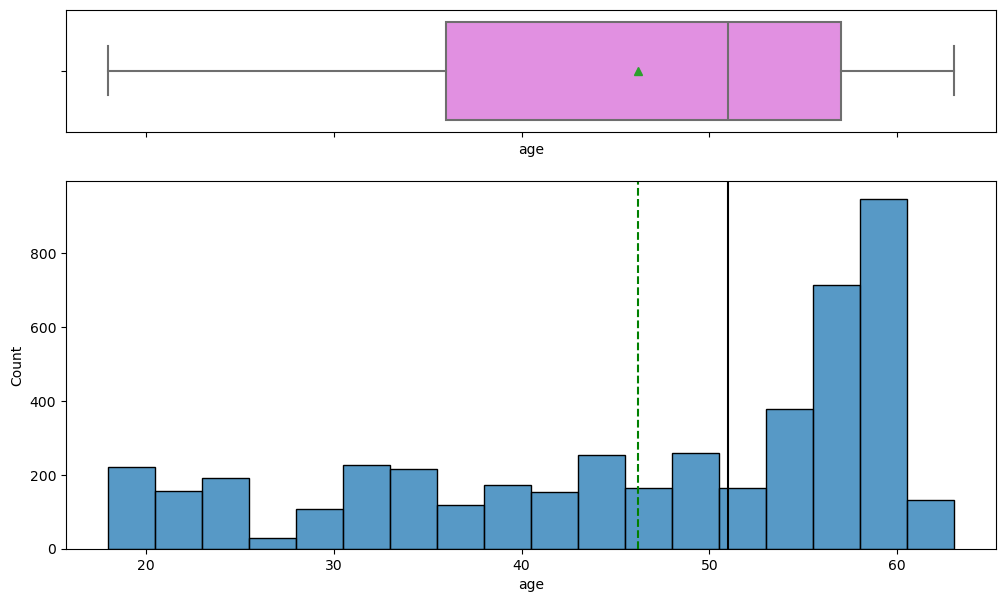


website_visits: Boxplot & Histogram
---------------------------------------------------


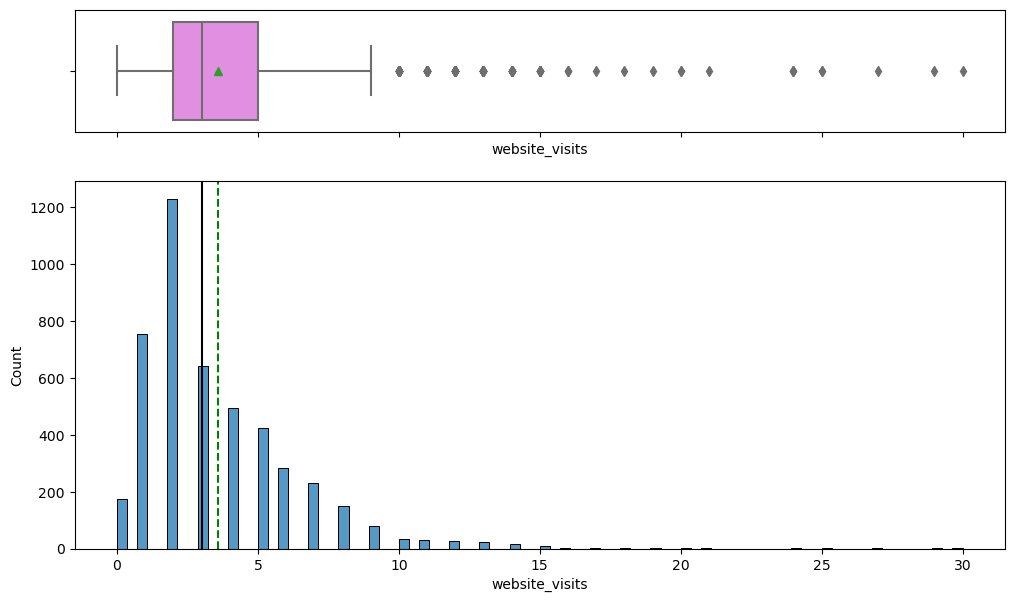


time_spent_on_website: Boxplot & Histogram
---------------------------------------------------


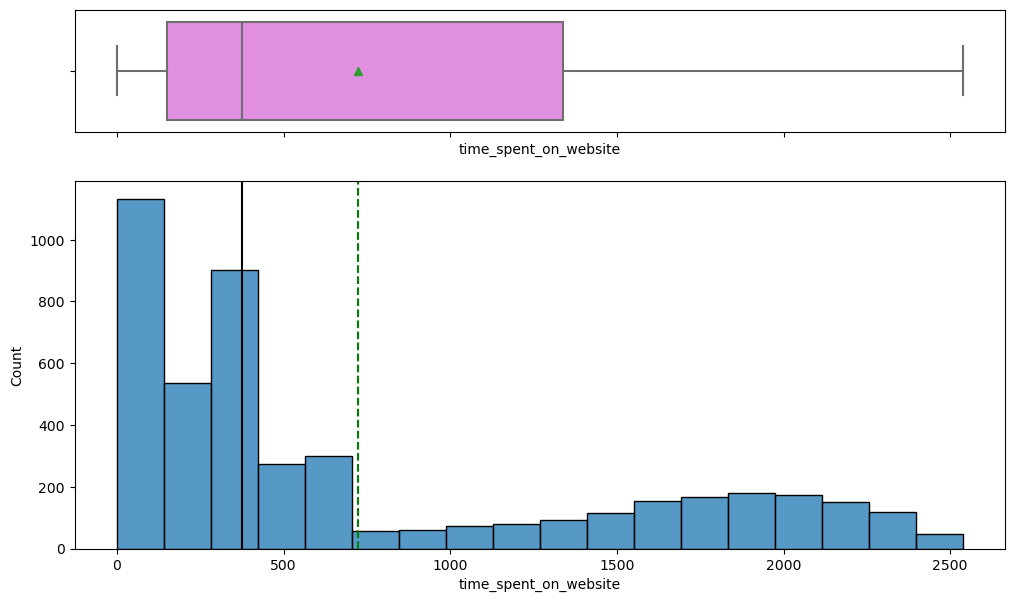


page_views_per_visit: Boxplot & Histogram
---------------------------------------------------


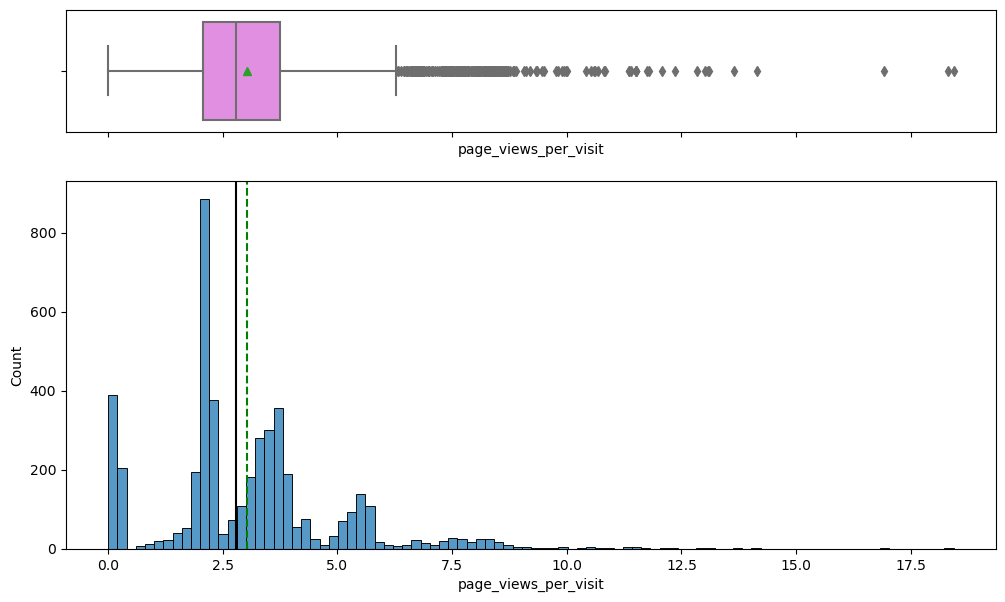

In [17]:
# colname_object_type
%matplotlib inline
for feature_numeric in colname_num_type[:-1]: 
    print(f"{feature_numeric}: Boxplot & Histogram")
    print("---------------------------------------------------")
    histogram_boxplot(data, feature_numeric) 
    print()     

#### <span style="color:blue">Univariate Distributions for Object type Input Features: ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']</span>

current_occupation: Countplot
---------------------------------------------------


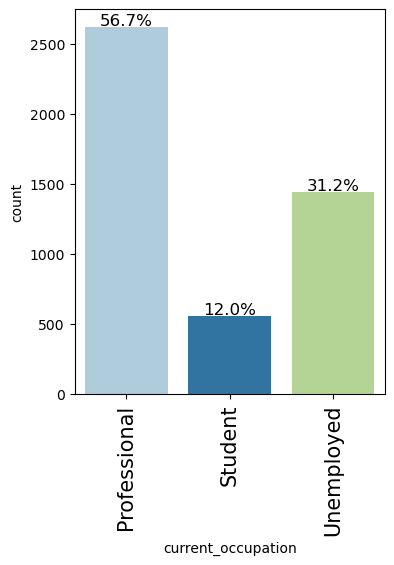


first_interaction: Countplot
---------------------------------------------------


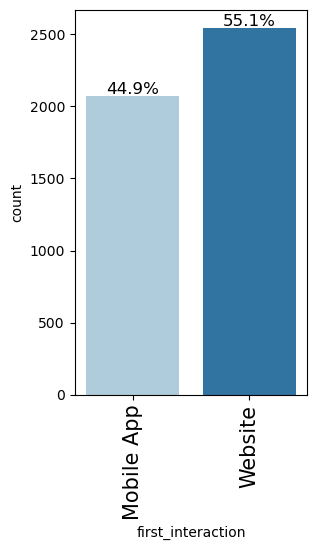


profile_completed: Countplot
---------------------------------------------------


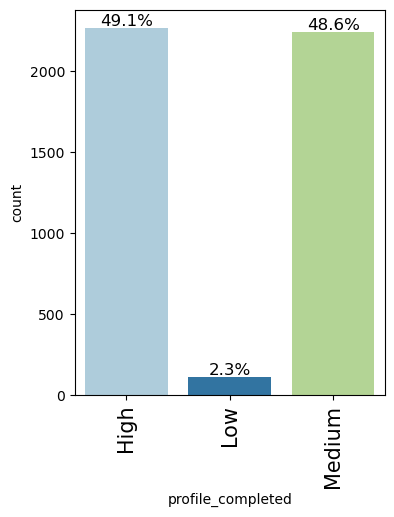


last_activity: Countplot
---------------------------------------------------


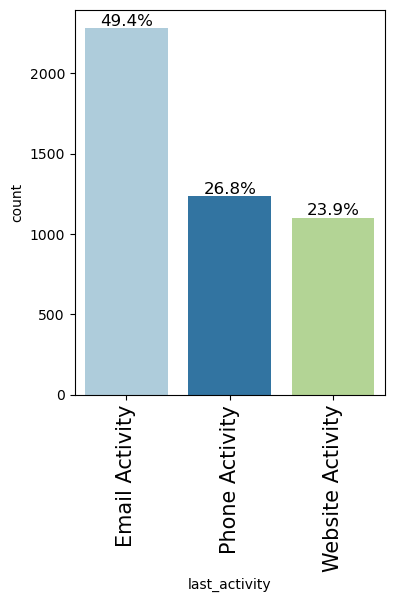


print_media_type1: Countplot
---------------------------------------------------


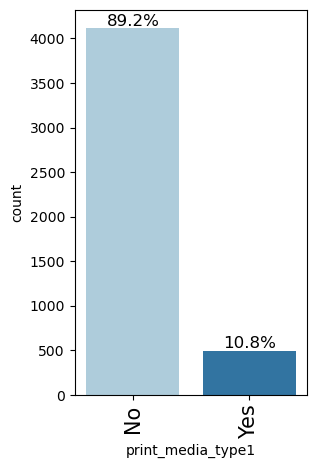


print_media_type2: Countplot
---------------------------------------------------


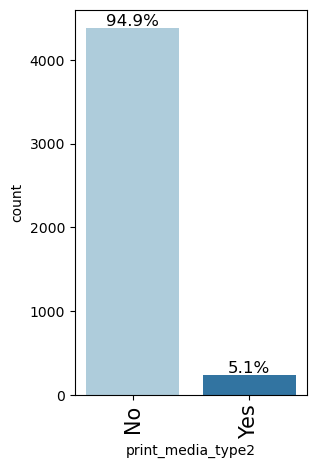


digital_media: Countplot
---------------------------------------------------


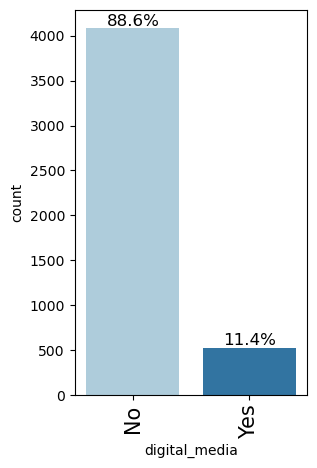


educational_channels: Countplot
---------------------------------------------------


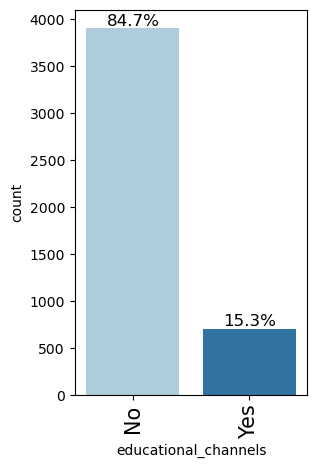


referral: Countplot
---------------------------------------------------


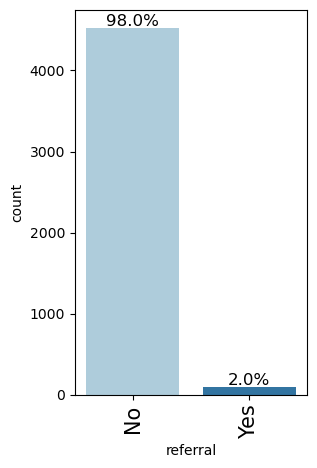

In [19]:

for feature_obj in colname_object_type[1:]: 
    print(f"{feature_obj}: Countplot")
    print("---------------------------------------------------")
    labeled_barplot(data, feature_obj, perc=True)
    print()     

### <span style="color:blue">Observations from Univariate Distributions</span>

- Average age of the leads is 46 years. The minimum age is 18 and the maximum age is 63.
- Number of times a lead visits the web site is 4, with average number of pages is 3 and average time of browsing the website is aprrox. 700 minutes.    

### <span style="color:blue">Do the current_occupation impact/influence on converting to leads: Chi-square test?</span>

- NULL HYPOTHESIS: There is no association or relationship between current occupation and convertion of leads
- ALTERNATIVE HYPOTHESIS: There is an association or relationship between current occupation and convertion of leads
- Accceptance criteria = 5%  (The threshold of the Risk (in terms of probability) of ACCEPTING A FALSE NULL HYPOTHESIS - Type I error)
- If p-valve (probability of observing the data assuming the null hypothesis is true) IS LESS THAN the acceptnace criteria, we REJECT the NULL hypothesis in favor of the alternative hypothesis

- <span style="color:blue">The chi-square test below shows that there is an associaton or relationship between current occupation and convertion of leads.</span>   

In [22]:
occupation_converting_count = pd.crosstab(index=data['current_occupation'], columns=data['status'], values='count', aggfunc='count')
print(occupation_converting_count)

status                 0    1
current_occupation           
Professional        1687  929
Student              490   65
Unemployed          1058  383


In [23]:
from scipy.stats import chi2_contingency, chi2

null_hypothesis: "There is NO ASSOCIATION or RELATIONSHIP between current occupation and convertion of leads"
alternative_hypothesis =  "There is an ASSOCIATION or RELATIONSHIP between current occupation and convertion of leads"
acceptance_criteria = 0.05

occupation_converting_count_values = occupation_converting_count.values

chi2_statistic, p_val, dof, expected_obs = chi2_contingency(occupation_converting_count_values)

print(f"chi2_statistics: {round(chi2_statistic,4)} and p-val: {round(p_val,4)}")

## Get critical statistic for our test
critical_statistic = chi2.ppf(1 - acceptance_criteria, dof)

print(f"critical statistic: {round(critical_statistic,4)}")

## Print the result (p-val)
if p_val <= acceptance_criteria:
    print(f"As p-val {round(p_val,4)} is lower than acceptance_criteria of {acceptance_criteria}, we REJECT the null_hypothesis and conclude that {alternative_hypothesis}")
else:
    print(f"As p-val {round(p_val,4)} is higher than acceptance_criteria of {acceptance_criteria}, we RETAIN the null_hypothesis: {null_hypothesis}")

chi2_statistics: 134.599 and p-val: 0.0
critical statistic: 5.9915
As p-val 0.0 is lower than acceptance_criteria of 0.05, we REJECT the null_hypothesis and conclude that There is an ASSOCIATION or RELATIONSHIP between current occupation and convertion of leads


### <span style="color:blue">Do the first_interaction (Mobile or Website) impact/influence on converting to leads: Chi-square test?</span>

- The chi-square test (see below) shows there is a relationship between the first_interaction and convertion of leads, the p-value (0.0) is less than the significant level of 0.05  

In [25]:
firstinteraction_converting_count = pd.crosstab(index=data['first_interaction'], columns=data['status'], values='count', aggfunc='count')
print(firstinteraction_converting_count)

firstinteraction_converting_value = firstinteraction_converting_count.values

chi2_statistic, p_val, dof, expected_obs = chi2_contingency(firstinteraction_converting_value)

print(f"chi2_statistics: {round(chi2_statistic,4)} and p-val: {round(p_val,4)}")

status                0     1
first_interaction            
Mobile App         1852   218
Website            1383  1159
chi2_statistics: 668.0814 and p-val: 0.0


### <span style="color:blue">Correlaton coefficient</span>

- <span style="color:blue">It seems time_spent_on_website has a moderate positive association (corr = 0.30) on convertion of leads</span>
- <span style="color:blue">Age seems to have a positive association - however the correlation coefficient is low, 0.12</span>  

In [27]:
data[colname_num_type].corr()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
age,1.00000,-0.01197,0.01888,-0.04068,0.12208
website_visits,-0.01197,1.00000,0.06230,0.07409,-0.00661
time_spent_on_website,0.01888,0.06230,1.00000,0.06813,0.30210
page_views_per_visit,-0.04068,0.07409,0.06813,1.00000,0.00031
status,0.12208,-0.00661,0.30210,0.00031,1.00000


### <span style="color:blue">See the impact of first_interaction (Mobile or Website) via stacked_barplot</span>
- <span style="color:blue"> We observe that the first interaction with Website has more convertion rate (46%) than Mobile App (11%) </span>

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


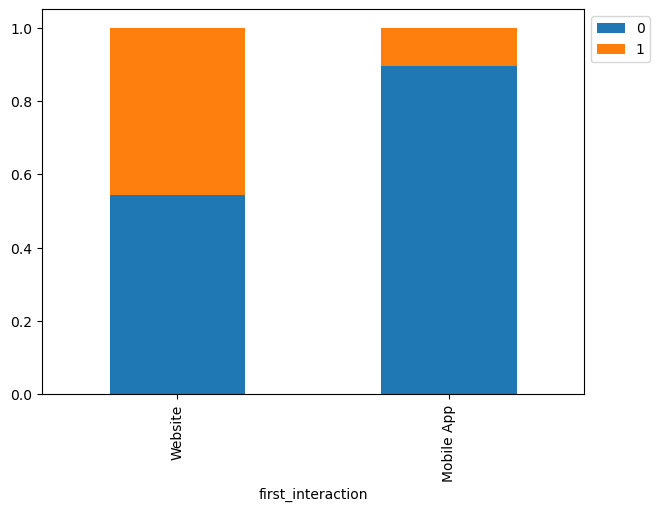

In [29]:
stacked_barplot(data, "first_interaction", "status")

### <span style="color:blue">See the impact of current_occupation (Professional, Unemployed, or Student) via stacked_barplot</span>
- <span style="color:blue">We observe that Professional has relativly higher convertion rate (36%) than Unemployed (27%)</span>

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


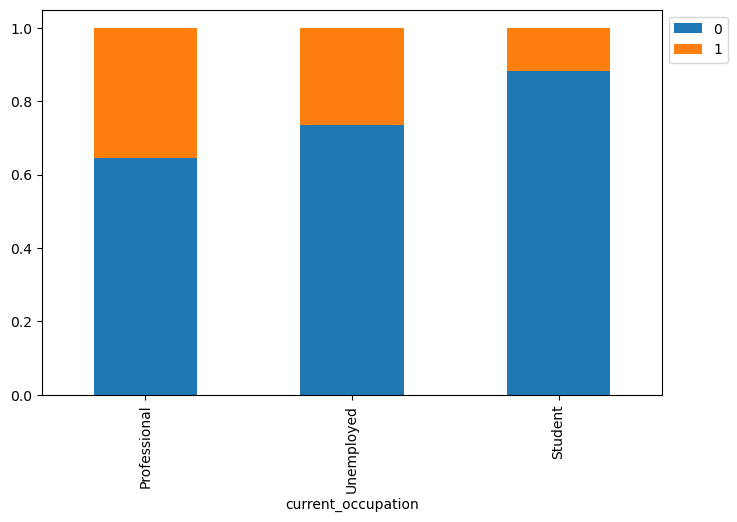

In [31]:
stacked_barplot(data, "current_occupation", "status")

### <span style="color:blue">See the impact of profile_completed (High, Medium, Low) via stacked_barplot</span>
- <span style="color:blue">We observe that those who have completed the profile are converted more (42%) than who did not complete the profile</span>

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


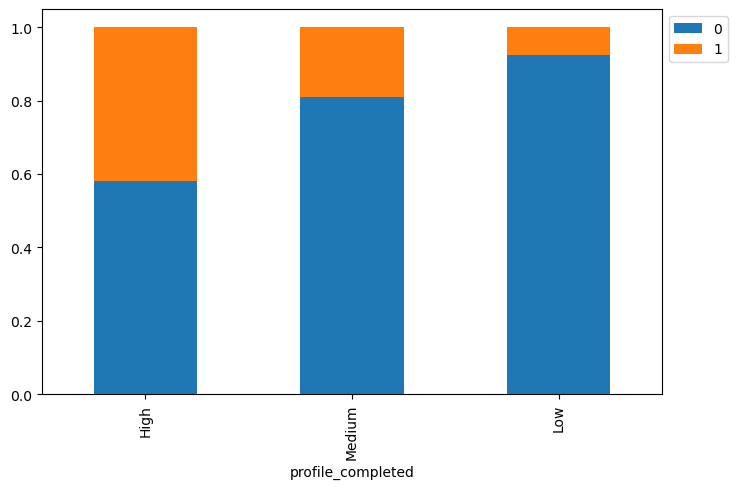

In [33]:
stacked_barplot(data, "profile_completed", "status")

### <span style="color:blue">Summary from  Exploratory Data Analysis</span>

- <span style="color:blue">The dataset has more than 4,000 observations with no missing values or duplicated rows in the dataset. </span>

- <span style="color:blue">The dataset is imbalance in the sense that only 30% of the leads are converted to addmission
 
- <span style="color:blue">Chi-square test shows that there is an association or relatonship between current occupation and convertion of leads</span>

- <span style="color:blue">Chi-square test shows that there is an association or relatonship between the first interaction and convertion of leads</span>

- <span style="color:blue"> The first interaction via website has a 46% convertion rate (out of 2542 leads, who first interacted via website, 1159 are converted to addmission)</span>

- <span style="color:blue"> Professionals are more inclined to convertion than Unemployed and Student</span>

- <span style="color:blue"> Those who completed the profile are more prone to convertion than those who did not complete the profile</span>

- <span style="color:blue">time_spent_on_website seems to be have a moderate positive correlation (0.30) on the convertion of leads meaning that those who spends more time on browsing the website might be prone to convertion</span>

In [35]:
data.sample(5, random_state=42)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
1073,EXT1074,23,Student,Mobile App,High,7,243,3.51200,Email Activity,No,No,No,No,No,0
2749,EXT2750,32,Professional,Mobile App,Medium,0,0,0.00000,Email Activity,No,No,No,No,No,0
1374,EXT1375,45,Unemployed,Mobile App,Medium,2,179,5.48300,Email Activity,Yes,No,No,Yes,No,0
4484,EXT4485,35,Professional,Website,Low,7,56,3.98500,Phone Activity,No,No,No,No,No,1
3824,EXT3825,24,Student,Mobile App,Medium,2,2275,3.14100,Email Activity,No,No,No,No,No,0


In [36]:
data.drop("ID", axis=1, inplace=True)

In [37]:
data.sample(5, random_state=42)

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
1073,23,Student,Mobile App,High,7,243,3.51200,Email Activity,No,No,No,No,No,0
2749,32,Professional,Mobile App,Medium,0,0,0.00000,Email Activity,No,No,No,No,No,0
1374,45,Unemployed,Mobile App,Medium,2,179,5.48300,Email Activity,Yes,No,No,Yes,No,0
4484,35,Professional,Website,Low,7,56,3.98500,Phone Activity,No,No,No,No,No,1
3824,24,Student,Mobile App,Medium,2,2275,3.14100,Email Activity,No,No,No,No,No,0


## Building a Decision Tree model

In [39]:
# shuffle data
data = shuffle(data, random_state=42)

########################################################################
## Split input variables and output variables
########################################################################

X = data.drop("status", axis=1)
y = data["status"]

########################################################################
## Split out train and test set
########################################################################

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state=42, stratify=y)

########################################################################
## Deal with categorical features
########################################################################
one_hot_encoder  = OneHotEncoder(sparse_output=False, drop='first')

categorical_vars = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 
                    'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
X_train_encoder_array = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoder_array = one_hot_encoder.transform(X_test[categorical_vars])

# print("encoder variables array")
# print(encoder_vars_array)

encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)
print("encoder feature names")
print(encoder_feature_names)

X_train_encoder = pd.DataFrame(X_train_encoder_array, columns=encoder_feature_names)
## concat df side by side column wise
X_train = pd.concat([X_train.reset_index(drop=True),
                   X_train_encoder.reset_index(drop=True)], axis=1)
X_train.drop(categorical_vars, axis=1, inplace=True)

X_test_encoder = pd.DataFrame(X_test_encoder_array, columns=encoder_feature_names)
## concat df side by side column wise
X_test = pd.concat([X_test.reset_index(drop=True),
                   X_test_encoder.reset_index(drop=True)], axis=1)
X_test.drop(categorical_vars, axis=1, inplace=True)

encoder feature names
['current_occupation_Student' 'current_occupation_Unemployed'
 'first_interaction_Website' 'profile_completed_Low'
 'profile_completed_Medium' 'last_activity_Phone Activity'
 'last_activity_Website Activity' 'print_media_type1_Yes'
 'print_media_type2_Yes' 'digital_media_Yes' 'educational_channels_Yes'
 'referral_Yes']


[[570  77]
 [ 85 191]]


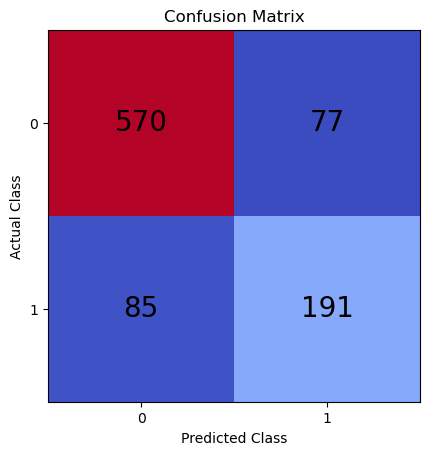

In [40]:
########################################################################
## Model training
########################################################################
dtree_clf = DecisionTreeClassifier(random_state=42)
dtree_clf.fit(X_train, y_train)

########################################################################
## Model Assessment
########################################################################
## predict on X_test
y_pred_class = dtree_clf.predict(X_test)

y_pred_prob = dtree_clf.predict_proba(X_test)[:,1]

# Confusin matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
print(conf_matrix)

# plt.style.use("seaborn")
plt.matshow(conf_matrix, cmap="coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
for (i,j), corr_val in np.ndenumerate(conf_matrix):
    plt.text(j,i, corr_val, ha="center", va="center", fontsize=20)
plt.show()

### <span style="color:blue">Impact of Precision (measure of Type I Error):</span> 
- The classifier predicted leads for convertion, actually they did not enroll. So such cases drains company's resources.
  
- Higher Precision indicates that the classifier makes few false positive mistakes  


### <span style="color:blue">Impact of Recall or Sensitivity (True Positive Rate / Type II Error): more impactful in this case</span>  
- The classifier estimated leads for NOT convertion, actually they did enroll. So such cases imply that potential candidates might not be given priorities and the company may lose 
  
- Higher Recall indicates that the classifier makes few false negative mistakes  

In [43]:
## CHECK overfitting: classifcation_report on training data
y_pred_train = dtree_clf.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2588
           1       1.00      1.00      1.00      1101

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



In [44]:
## classification_report on test set
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       647
           1       0.71      0.69      0.70       276

    accuracy                           0.82       923
   macro avg       0.79      0.79      0.79       923
weighted avg       0.82      0.82      0.82       923



- "Non Converted": The Classifier achieved precision of 0.87, recall of 0.88, f1-score 0.88
- "Converted": The Classifier achieved precision of 0.71, recall of 0.69, f1-score 0.70
- Overall acuaracy of the model is 82%
- macro avg: The unweighted average of precision, recall, and f1-score. Each class contributes equally
- weighted avg: The average of precision, recall, and f1-score, weighted by the number of true instances of each class. This takes class imbalance into account     

## Do we need to prune the tree?

The base DecisionTreeClassifier model has overfitting issues. So we need to prume the Tree. We will use GridSearchCV 

### <span style="color:blue">GridSearchCV: DecisionTreeClassifier hyper-parameter tuning</span> 

In [49]:
d_tree_tuned = DecisionTreeClassifier(random_state = 42, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=42)

In [50]:
## TRAINING SET: Classification report
y_pred_train = d_tree_tuned.predict(X_train)
print("Training Data: Classification Report (for Checking overfitting)")
print("-"* 120)
print(classification_report(y_train, y_pred_train))

print()
print("Test Data: Classification Report")
print("-"* 120)
y_pred_test = d_tree_tuned.predict(X_test)
print(classification_report(y_test, y_pred_test))

Training Data: Classification Report (for Checking overfitting)
------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2588
           1       0.59      0.90      0.72      1101

    accuracy                           0.79      3689
   macro avg       0.77      0.82      0.77      3689
weighted avg       0.84      0.79      0.80      3689


Test Data: Classification Report
------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       647
           1       0.61      0.90      0.73       276

    accuracy                           0.80       923
   macro avg       0.78      0.83      0.78       923
weighted avg       0.85      0.80      0.81       923



['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'current_occupation_Student', 'current_occupation_Unemployed', 'first_interaction_Website', 'profile_completed_Low', 'profile_completed_Medium', 'last_activity_Phone Activity', 'last_activity_Website Activity', 'print_media_type1_Yes', 'print_media_type2_Yes', 'digital_media_Yes', 'educational_channels_Yes', 'referral_Yes']
16


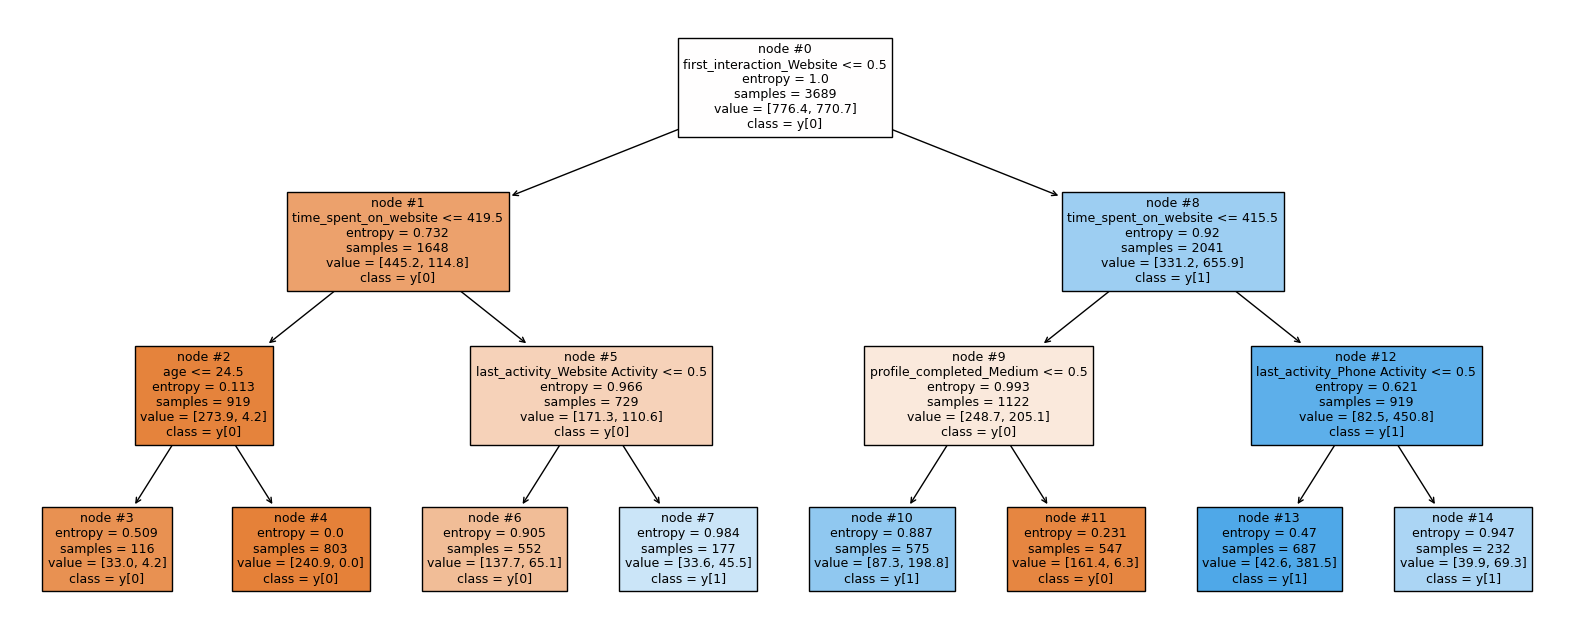

In [51]:
features = list(X_test.columns)
print(features)
print(len(features))
plt.figure(figsize = (20, 8))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [52]:
print(features)

['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'current_occupation_Student', 'current_occupation_Unemployed', 'first_interaction_Website', 'profile_completed_Low', 'profile_completed_Medium', 'last_activity_Phone Activity', 'last_activity_Website Activity', 'print_media_type1_Yes', 'print_media_type2_Yes', 'digital_media_Yes', 'educational_channels_Yes', 'referral_Yes']


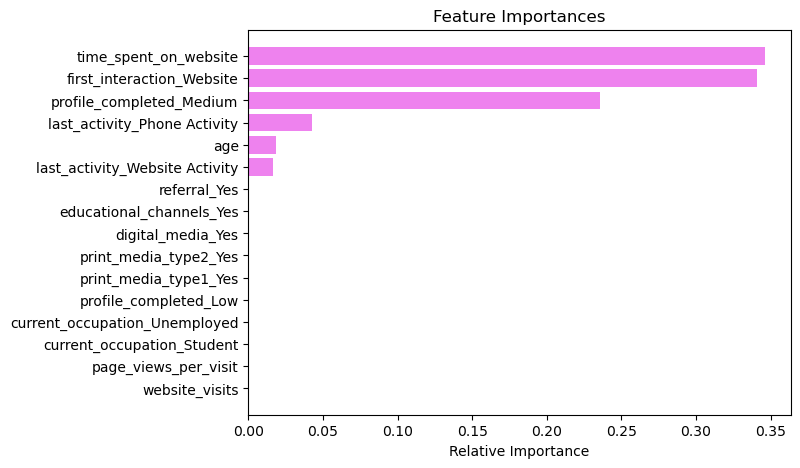

In [53]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (7, 5))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

## Building a Random Forest model

In [55]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state=42)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)
print("Training Data: Random Forest (without Hyper-parameter tuning) Classification Report (for Checking overfitting)")
print("-"* 120)
print(classification_report(y_train, y_pred_train3))

print()
print("Test Data: Random Forest (without Hyper-parameter tuning) Classification Report")
print("-"* 120)
# Checking performance on the testing data
y_pred_test3 =rf_estimator.predict(X_test)

print(classification_report(y_test, y_pred_test3))

Training Data: Random Forest (without Hyper-parameter tuning) Classification Report (for Checking overfitting)
------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2588
           1       1.00      1.00      1.00      1101

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689


Test Data: Random Forest (without Hyper-parameter tuning) Classification Report
------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       647
           1       0.82      0.71      0.76       276

    accuracy                           0.87       923
   macro avg       0.

### <span style="color:blue">GridSearchCV: RandomForestClassifier hyper-parameter tuning</span> 

## Do we need to prune the tree?

In [59]:
# Choose the type of classifier 
rf_tuned = RandomForestClassifier(random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "criterion": ["gini", "entropy"],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }
# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

In [60]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=110, random_state=7)

In [62]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)
print("Training Data: Random Forest (With Hyper-parameter tuning) Classification Report (for Checking overfitting)")
print("-"* 120)
print(classification_report(y_train, y_pred_train4))

# Checking performance on the test data
y_pred_test4 = rf_estimator_tuned.predict(X_test)
print()
print("Test Data: Random Forest (With Hyper-parameter tuning) Classification Report")
print("-"* 120)
print(classification_report(y_test, y_pred_test4))

Training Data: Random Forest (With Hyper-parameter tuning) Classification Report (for Checking overfitting)
------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2588
           1       0.68      0.87      0.76      1101

    accuracy                           0.84      3689
   macro avg       0.81      0.85      0.82      3689
weighted avg       0.86      0.84      0.84      3689


Test Data: Random Forest (With Hyper-parameter tuning) Classification Report
------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       647
           1       0.70      0.86      0.77       276

    accuracy                           0.85       923
   macro avg       0.81    

In [63]:
print(confusion_matrix(y_test, y_pred_test4))

[[544 103]
 [ 40 236]]


[[544 103]
 [ 40 236]]


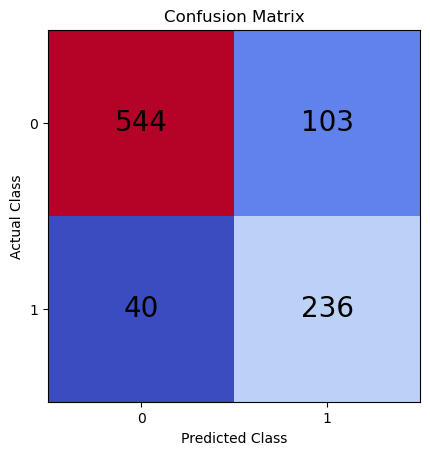

In [64]:
# Confusin matrix
conf_matrix = confusion_matrix(y_test, y_pred_test4)
print(conf_matrix)

# plt.style.use("seaborn")
plt.matshow(conf_matrix, cmap="coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
for (i,j), corr_val in np.ndenumerate(conf_matrix):
    plt.text(j,i, corr_val, ha="center", va="center", fontsize=20)
plt.show()

### Feature Importance (Random Forest Classifier)

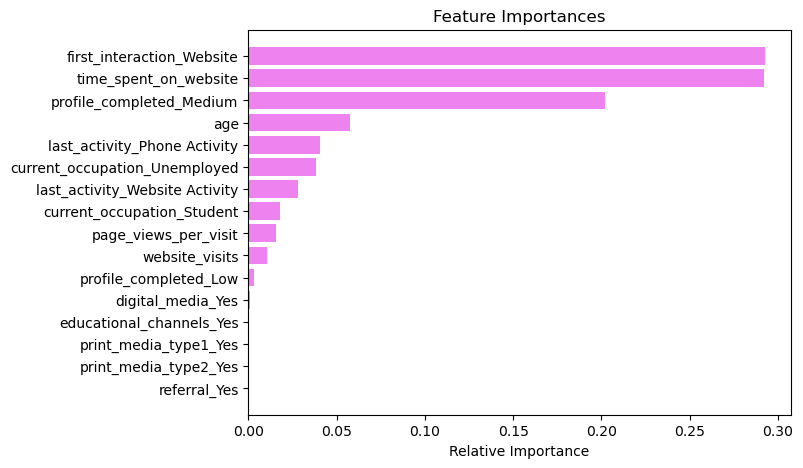

In [66]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X_test.columns)

plt.figure(figsize = (7, 5))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

## Actionable Insights and Recommendations

### <span style="color:blue">Context</span>:
- The project predicts the probability of enrolling a lead into an online course based on leads' profession, age, behavioral pattern of using marketing media like mobile or website, duration of website visits, and number of pages visited.
- Exploratory data analysis shows that only 30% leads were converted or enrolled into the course. 70% leads do not convert or enroll into the program.
- The objective of this project is to build a predictive machine learning model that will provide the probaility of enrollment of laed based on the input features like age, profession, first intercation via mobile or website, during of website visits, and number of pages visited. The model also provide the relative importance of input features.

### <span style="color:blue">Actions</span>:
- Two machine learning classificaion models, Decision Tree and Random Forest are used.
- Since the dataset is imbalance, models are designed to emphasize reducing the probability of misjuding a lead such that he/she might not enroll but he would actually enroll. In other words, the models are crafted to increase recall reducing the number of false negatives.

### <span style="color:blue">Results</span>:
- Random Forest Classifier with GridSearch Cross-Validation provides (on test data) a better result with an overall accuracy of 85%, Recall 85%, Precision of 70%.
- Relative feature importance shows that the *first interaction*, *time spent on website*, *profile completion*, *age*, *last activity*, and *current profession* play a vital role in converting leads enrolling into the course.     

### <span style="color:blue"> Recommendations</span>:
- First impression lasts. Marketing department should take care imporving the first interaction with leads.
- Leads who are professional having age over 40 and completed their profiles should be monitored and contacted more closly. As they are highly likely leads to enroll into the program.
- Marketing costs related to printed media and educational channels should be reduced.
- As the non-converting leads are as high as 70%, other important factors like Course content/materials, Teaching and presentation style, Course duration, Job opposrtunities/offers after completion of the course should also consider into the model as features.            